# A few tips to get started with homework 1

1. We saw that the netcdf SCCOOS data is not properly saved in the OpenDap server, so Python is having trouble reading it directly from the server. For this homework you should download the data and have it locally.


2. Here I'm running this notebook with the following packages/versions


    1. netCDF4=1.5.3
    2. xarray=0.16.1
    3. matplotlib=3.2.2
    4. numpy=1.18.5
    

3. Also, it might help with bugs if you install the nc-time-axis  package. Run on the terminal

`conda install -c conda-forge nc-time-axis` 


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import glob

In [2]:
# Here it will be the path to the place where you saved your data
ds = xr.open_dataset('data/SCCOOS/scripps_pier-2020.nc')

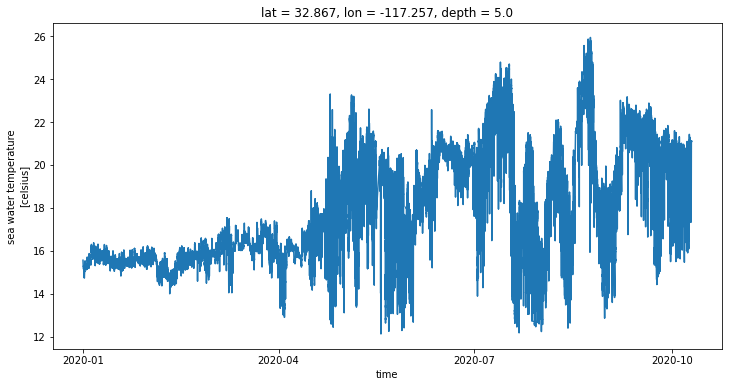

In [5]:
plt.figure(figsize=(12,6))
ds.temperature.plot()

In [7]:
temp = ds.temperature.values
print('The average temperature is:', np.mean(temp))
print('The average temperature is:', np.std(temp, ddof=1))

The average temperature is: 17.966259
The average temperature is: 2.6520088


### Now let's see how to loop through many files

In [9]:
# This is the path to your data. Also, for the example I only have 3 files
file_list = sorted(glob.glob('data/SCCOOS/scripps_pier*.nc'))
print(file_list)

['data/SCCOOS/scripps_pier-2018.nc', 'data/SCCOOS/scripps_pier-2019.nc', 'data/SCCOOS/scripps_pier-2020.nc']


In [19]:
all_temps = []
for file in file_list:
    ds = xr.open_dataset(file)
    all_temps.extend(list(ds.temperature.values))
all_temps = np.array(all_temps)

In [24]:
print('The mean in 2020 is:', temp.mean(), 'The mean off all 3 years is:', np.mean(all_temps))

The mean in 2020 is: 17.966259 The mean off all 3 years is: 18.137014


### Now doing the same using netCDF4 instead of xarray

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from netCDF4 import Dataset, num2date
import glob

In [26]:
nc = Dataset('data/SCCOOS/scripps_pier-2020.nc', 'r')
nc.variables.keys()

dict_keys(['time', 'temperature', 'conductivity', 'pressure', 'salinity', 'chlorophyll_raw', 'chlorophyll', 'temperature_flagPrimary', 'temperature_flagSecondary', 'conductivity_flagPrimary', 'conductivity_flagSecondary', 'pressure_flagPrimary', 'pressure_flagSecondary', 'salinity_flagPrimary', 'salinity_flagSecondary', 'chlorophyll_flagPrimary', 'chlorophyll_flagSecondary', 'sigmat', 'diagnosticVoltage', 'currentDraw', 'aux1', 'aux3', 'aux4', 'instrument1', 'instrument2', 'platform1', 'station', 'lat', 'lon', 'depth', 'crs'])

In [27]:
temp = nc.variables['temperature'][:]
time = num2date(nc.variables['time'][:], nc.variables['time'].units)

Text(0.5, 1.0, 'Temperature at the SIO pier in 2020')

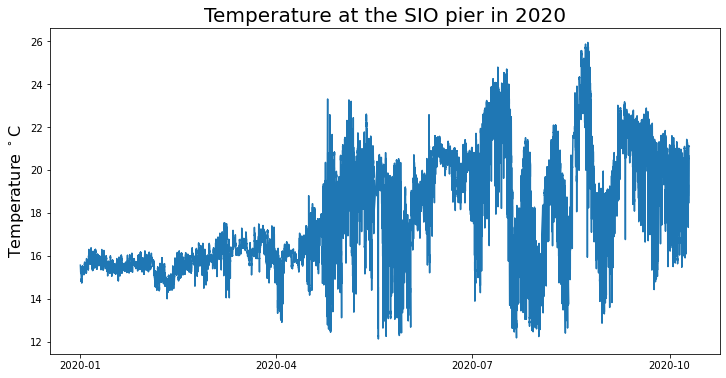

In [32]:
plt.figure(figsize=(12,6))
plt.plot(time, temp)
plt.ylabel('Temperature $^\circ$C', fontsize=16)
plt.title('Temperature at the SIO pier in 2020', fontsize=20)

In [34]:
all_temps = []
for file in file_list:
    nc = Dataset(file, 'r')
    all_temps.extend(list(nc.variables['temperature'][:]))
    nc.close()
all_temps = np.array(all_temps)

In [35]:
print('The mean in 2020 is:', temp.mean(), 'The mean off all 3 years is:', np.mean(all_temps))

The mean in 2020 is: 17.966259 The mean off all 3 years is: 18.137014


In [ ]:
# Trick to deal with the issue with time that happend during class

#factor = np.timedelta64(1, 's')
#t0 = np.datetime64('1970-01-01T00:00:00')
#time = t0 + nc.variables['time'][:] * factor
#print(time)